<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1264\709289469.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


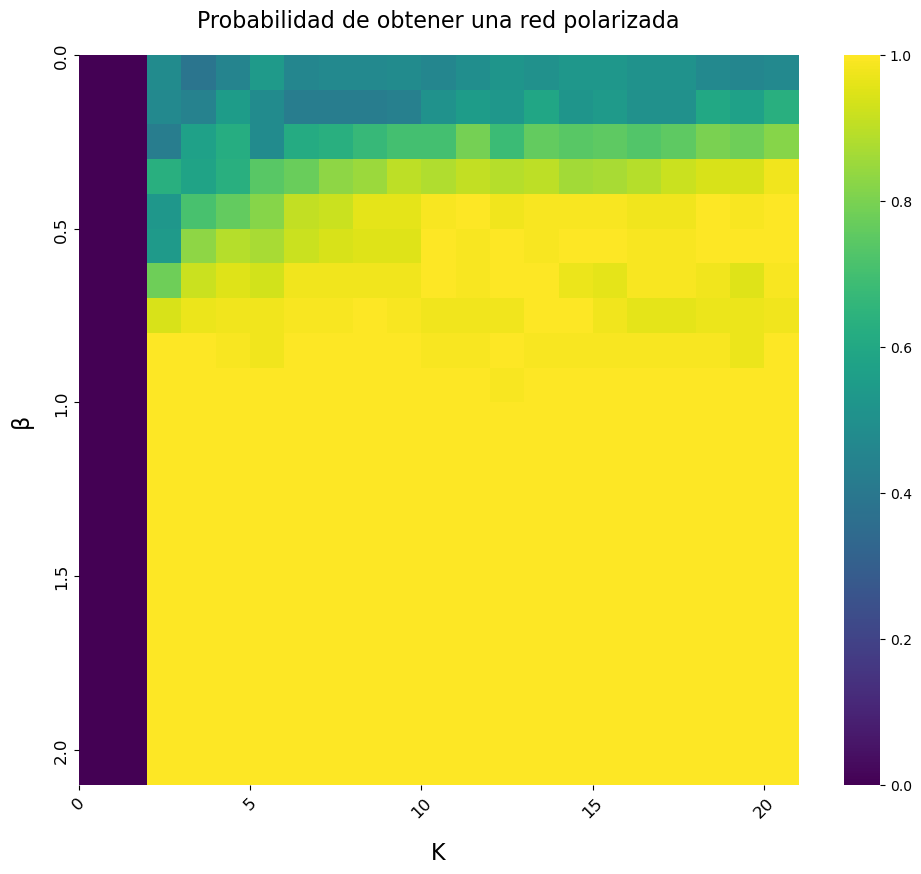

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer correctamente el archivo
data = pd.read_csv(r'C:\Users\USUARIO\CaOtIcOs\EJECUTABLES\Resultados.txt', 
                   sep='\s+',         
                   engine='python',   
                   header=None, 
                   names=['X', 'Y', 'prob', 'l'])

# Asegurar que son números
data['X'] = pd.to_numeric(data['X'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')
data['prob'] = pd.to_numeric(data['prob'], errors='coerce')

# Quitar filas malas
data = data.dropna()

# Crear tabla pivot
heatmap_data = data.pivot_table(index='Y', columns='X', values='prob', fill_value=0)

# Dibujar mapa
plt.figure(figsize=(12, 10))  # Tamaño mayor para que todo quepa bien
sns.heatmap(heatmap_data, cmap='viridis', annot=False)

# Titulo y etiquetas con ajustes de posición y tamaño
plt.title('Probabilidad de obtener una red polarizada', fontsize=16, pad=20)
plt.xlabel('K', fontsize=16, labelpad=15)  # Aumentado tamaño y separación
plt.ylabel('β', fontsize=16, labelpad=15)  # Aumentado tamaño y separación

# Obtener los límites actuales de los ejes
x_min, x_max = data['X'].min(), data['X'].max()
y_min, y_max = data['Y'].min(), data['Y'].max()

# Configurar los ticks del eje X
x_ticks = np.arange(x_min, x_max + 1, 5)  # De X mínima a X máxima, cada 5 unidades
x_labels = [str(int(x)) for x in x_ticks]  # Convertir a enteros y luego a strings

# Configurar los ticks del eje Y
y_ticks = np.arange(y_min, y_max + 0.1, 0.5)  # De Y mínima a Y máxima, cada 0.5 unidades
y_labels = [f"{y:.1f}" for y in y_ticks]  # Formatear con un decimal

# Establecer los ticks y etiquetas
plt.xticks(np.linspace(0, len(heatmap_data.columns) - 1, len(x_ticks)), x_labels, fontsize=12, rotation=45)
plt.yticks(np.linspace(0, len(heatmap_data.index) - 1, len(y_ticks)), y_labels, fontsize=12)

# Ajustar márgenes para evitar el recorte de los números
plt.subplots_adjust(bottom=0.15, left=0.15)

# Guardar la gráfica en formato PNG
plt.savefig('GRAFICA_MAPA.png', dpi=300, bbox_inches='tight')  # Alta resolución y ajuste de bordes

# Mostrar el gráfico
plt.show()